In [38]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

In [10]:
abt = pd.read_csv('analytical_base_table.csv')

In [11]:
abt_scoreless = abt.drop('score_combined', axis=1)

In [12]:
y = abt.bad_flag
X = abt.drop('bad_flag', axis=1)
X2 = abt_scoreless.drop('bad_flag', axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1234,
    stratify=abt.bad_flag
)

print(len(X_train), len(X_test), len(y_train), len(y_test))

3324 832 3324 832


In [14]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y,
    test_size=0.2,
    random_state=1234,
    stratify=abt.bad_flag
)

print(len(X2_train), len(X2_test), len(y2_train), len(y2_test))

3324 832 3324 832


In [37]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

lr = LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced')
lr.fit(X_train_imputed, y_train)

y_pred = lr.predict(X_test_imputed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7043269230769231

Confusion matrix:
 [[525 224]
 [ 22  61]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81       749
           1       0.21      0.73      0.33        83

    accuracy                           0.70       832
   macro avg       0.59      0.72      0.57       832
weighted avg       0.89      0.70      0.76       832



In [39]:
X2_train_imputed = imputer.fit_transform(X2_train)
X2_test_imputed = imputer.transform(X2_test)

lr = LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced')
lr.fit(X2_train_imputed, y2_train)

y2_pred = lr.predict(X2_test_imputed)

print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nConfusion matrix:\n", confusion_matrix(y2_test, y2_pred))
print("\nClassification report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.6598557692307693

Confusion matrix:
 [[494 255]
 [ 28  55]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78       749
           1       0.18      0.66      0.28        83

    accuracy                           0.66       832
   macro avg       0.56      0.66      0.53       832
weighted avg       0.87      0.66      0.73       832



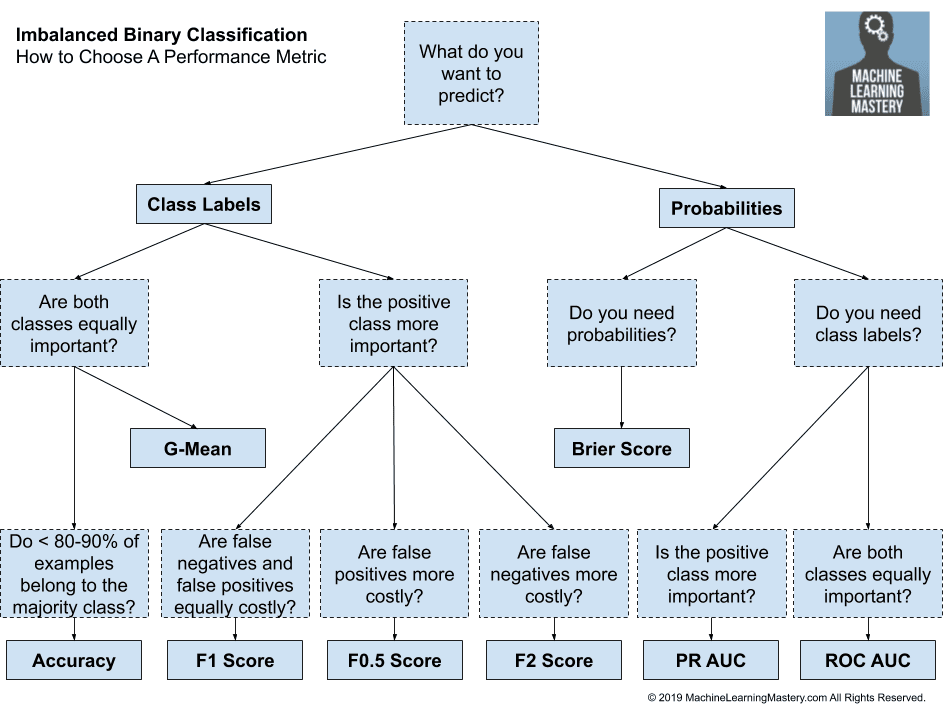

In [8]:
display(Image(filename='imbalanced_class.png', width=600))